In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
# Load the dataset
file_path = "Healthcare-Diabetes.csv"
df = pd.read_csv(file_path)

In [4]:
# Process Data
df = df.drop(columns=['Id'])

# Split features and target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [6]:
# Make predictions
y_pred = model.predict(X_test)

In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Accuracy: 0.7744
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       367
           1       0.73      0.52      0.61       187

    accuracy                           0.77       554
   macro avg       0.76      0.71      0.73       554
weighted avg       0.77      0.77      0.76       554



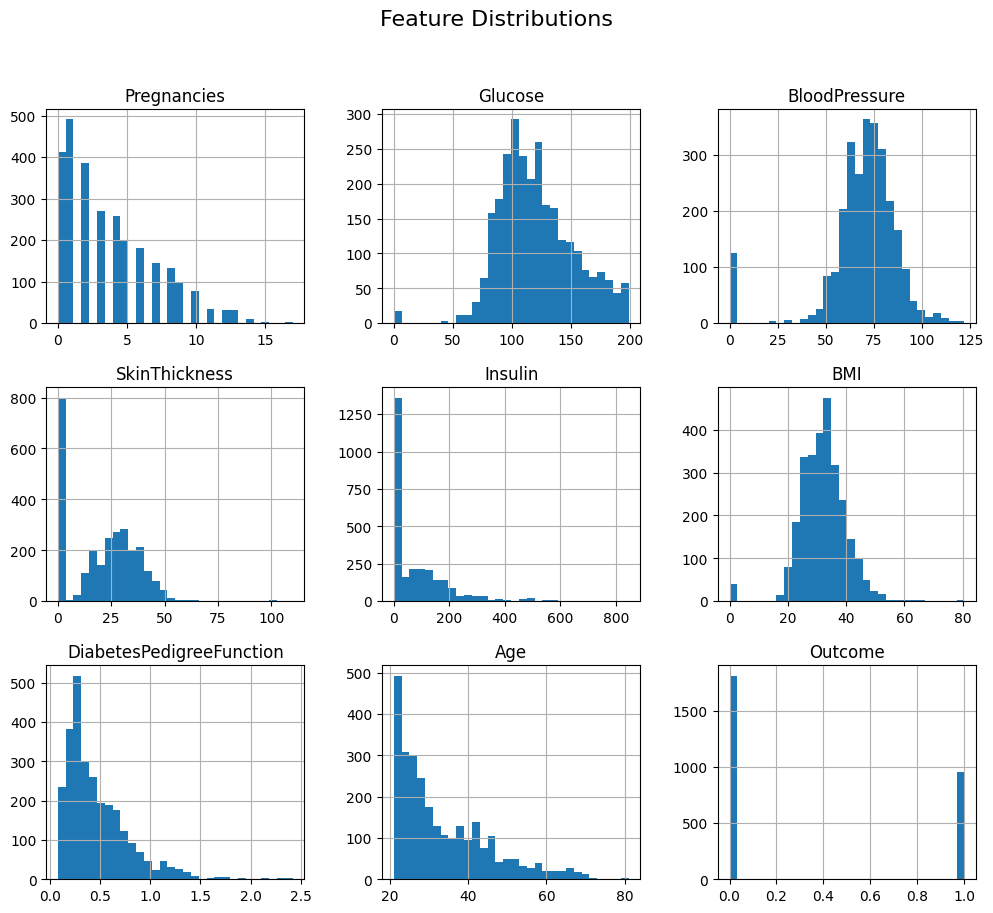

In [8]:
# Plot distributions for all features
def plot_feature_distributions(df):
    df.hist(figsize=(12, 10), bins=30)
    plt.suptitle("Feature Distributions", fontsize=16)
    plt.show()

plot_feature_distributions(df)

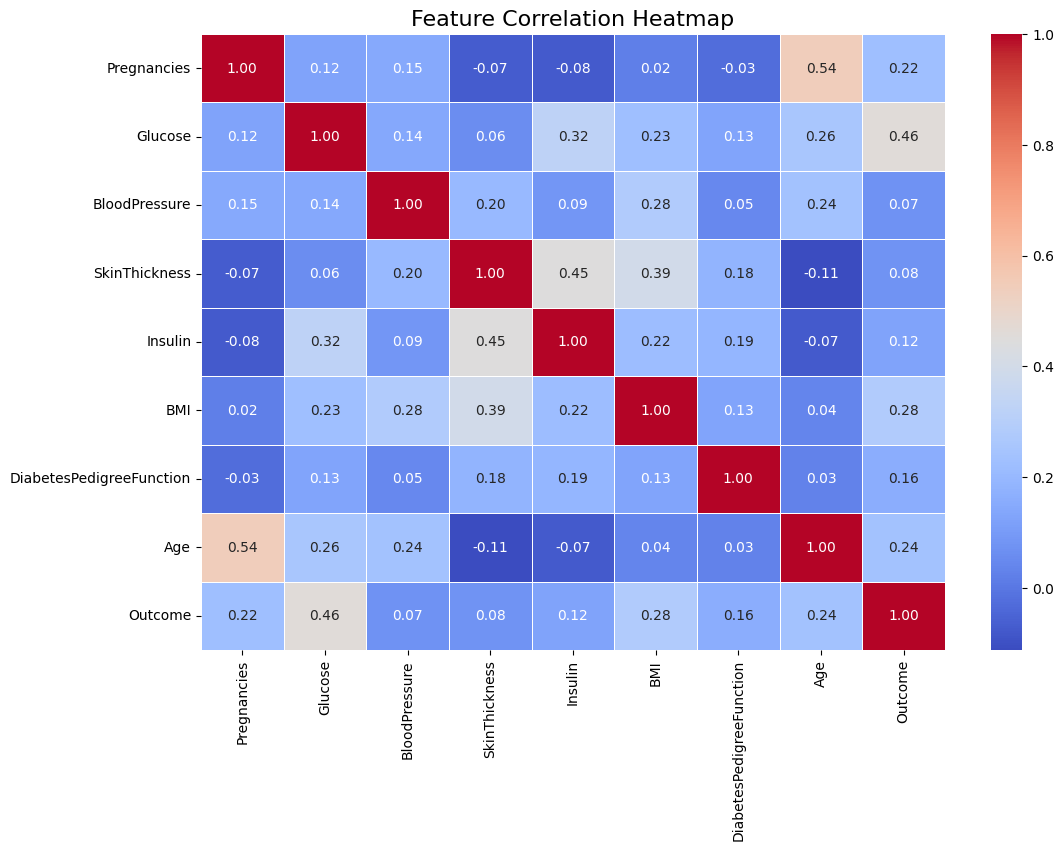

In [9]:
# Plot heatmap of feature correlations
def plot_correlation_heatmap(df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Feature Correlation Heatmap", fontsize=16)
    plt.show()

plot_correlation_heatmap(df)

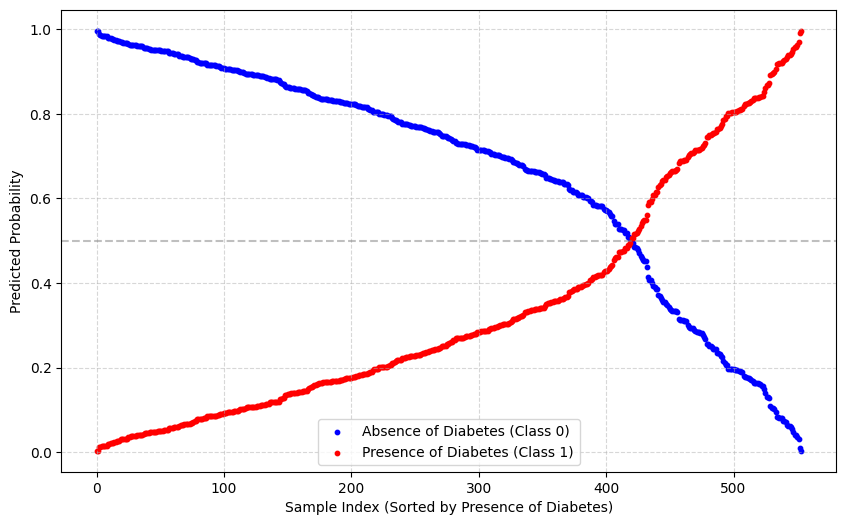

In [10]:
# Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probability for class 1 (malignant)

# Sort by probability
sorted_indices = np.argsort(y_probs)
sorted_probs = y_probs[sorted_indices]
sorted_labels = y_test.iloc[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(sorted_probs)), 1 - sorted_probs, color='blue', label="Absence of Diabetes (Class 0)", s=10)
plt.scatter(range(len(sorted_probs)), sorted_probs, color='red', label="Presence of Diabetes (Class 1)", s=10)
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
plt.xlabel("Sample Index (Sorted by Presence of Diabetes)")
plt.ylabel("Predicted Probability")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


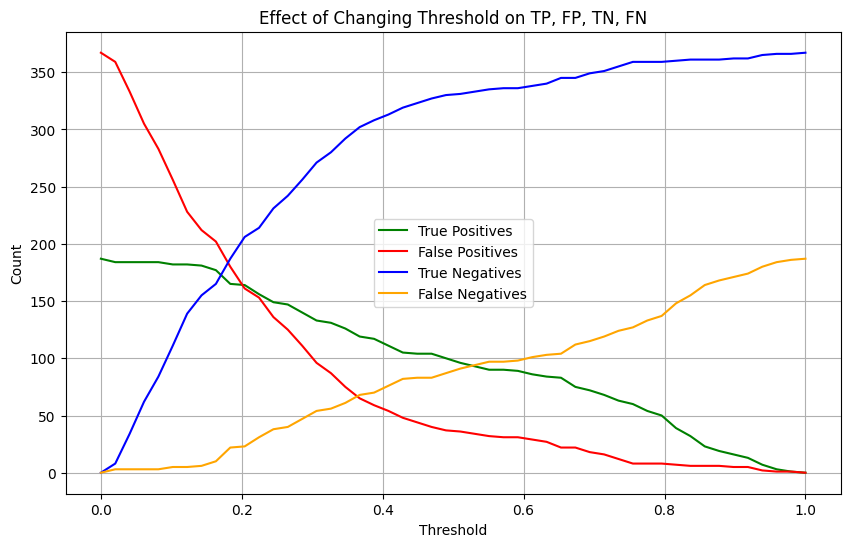

In [11]:
thresholds = np.linspace(0, 1, 50)
tp_rates, fp_rates, tn_rates, fn_rates = [], [], [], []

for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    tp_rates.append(tp)
    fp_rates.append(fp)
    tn_rates.append(tn)
    fn_rates.append(fn)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, tp_rates, label="True Positives", color="green")
plt.plot(thresholds, fp_rates, label="False Positives", color="red")
plt.plot(thresholds, tn_rates, label="True Negatives", color="blue")
plt.plot(thresholds, fn_rates, label="False Negatives", color="orange")

plt.xlabel("Threshold")
plt.ylabel("Count")
plt.title("Effect of Changing Threshold on TP, FP, TN, FN")
plt.legend()
plt.grid(True)
plt.show()

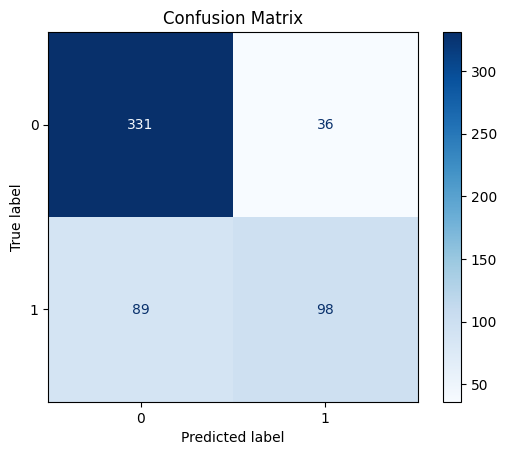

In [12]:
# Generate Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
